In [1]:
!pip install pulp



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 101.1 MB/s eta 0:00:00


In [2]:
from pulp import *


In [4]:

model = LpProblem("Maximize_Profit", LpMaximize)


In [5]:

A = LpVariable("Product_A", lowBound=0, cat='Continuous')
B = LpVariable("Product_B", lowBound=0, cat='Continuous')


In [6]:

model += 20 * A + 30 * B, "Total_Profit"


In [7]:

model += 2 * A + 3 * B <= 100, "Time_Limit"
model += 3 * A + 4 * B <= 120, "Material_Limit"


In [8]:

model.solve()


1

In [9]:

print("Status:", LpStatus[model.status])
print("Product A units:", A.varValue)
print("Product B units:", B.varValue)
print("Maximum Profit: ₹", value(model.objective))


Status: Optimal
Product A units: 0.0
Product B units: 30.0
Maximum Profit: ₹ 900.0


## 🔍 Business Insights

- The model helps determine the optimal number of Product A and B to produce.
- It ensures time and material limits are not exceeded.
- The result gives the **maximum profit** based on current resources.
- This is a basic example of how Linear Programming can support decision-making in real businesses.


In [10]:
!pip install matplotlib


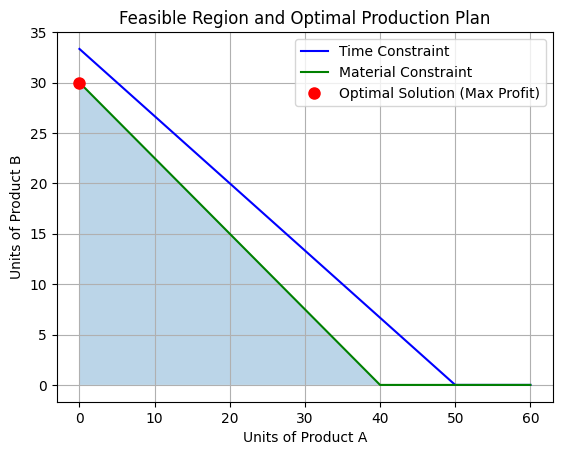

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define A (x-axis)
A_vals = np.linspace(0, 60, 400)

# Constraint lines
B_time = (100 - 2 * A_vals) / 3      # From 2A + 3B <= 100
B_material = (120 - 3 * A_vals) / 4  # From 3A + 4B <= 120

# Make sure B values are not negative
B_time = np.maximum(0, B_time)
B_material = np.maximum(0, B_material)

# Plot constraints
plt.plot(A_vals, B_time, label='Time Constraint', color='blue')
plt.plot(A_vals, B_material, label='Material Constraint', color='green')

# Feasible region fill
plt.fill_between(A_vals, np.minimum(B_time, B_material), alpha=0.3)

# Optimal point
plt.plot(A.varValue, B.varValue, 'ro', label='Optimal Solution (Max Profit)', markersize=8)

# Labels and legend
plt.xlabel("Units of Product A")
plt.ylabel("Units of Product B")
plt.title("Feasible Region and Optimal Production Plan")
plt.legend()
plt.grid(True)
plt.show()
